<left>
    <a href=img><img src = "https://proetica.icts.com.br/assets/img/ICTS-Protiviti-Logo.png" width="400"  />
</left>

## Análise exploratória de dados

## 
Autor: Tiago Moraes

### 1. Carregamento de informações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
print ("Libraries sucessfully loaded")  # print para assegurar que as bibliotecas necessárias carregaram corretamente

Libraries sucessfully loaded


In [2]:
filename_exp = "https://raw.githubusercontent.com/tiagottmoraes/admission-test/main/datasets/data_experimentos_CLEAN.csv"

In [3]:
# carregando arquivo data_experimentos_CLEAN produzido anteriomente e hospedado em repostório no Github para facilitar a compatibilidade deste notebook ao ser compartilhado 
df = pd.read_csv(filename_exp)

In [4]:
# # transformando as variáveis 'mes', 'ano', 'exp_id' como strings para nao atrapalharem os testes de correlação de variáveis
df[['mes', 'ano', 'exp_id']] = df[['mes','ano','exp_id']].astype('str')
df.dtypes

Unnamed: 0           int64
exp_id              object
ano                 object
mes                 object
product-type        object
steel               object
carbon               int64
hardness             int64
condition           object
formability        float64
strength             int64
surface-quality     object
shape               object
thick              float64
width              float64
len                float64
bore                 int64
recozimento         object
dtype: object

In [5]:
# removendo a coluna "Unnamed: 0"
df=df.drop(['Unnamed: 0'], axis = 1)

#### 1.1 Analizando aspectos individuais das variáveis

In [6]:
# One-hot encoding para a variável dependente "recozimento"
df_dummy = pd.get_dummies(df['recozimento'])


#### Precisamos estudar a variação da qualidade do recozimento (variável "recozimento") em relação as demais variáveis. Como 'recozimento' se trata de uma variável categórica (ou seja, não-contínua) necessitamos, primeiramente, transformá-la em uma variável continua, para que esta possa ser usada nas análises subsequentes. Para realizar isso, utilizou-se da técnica chamada 'one-hot encoding' para transformar as classes desta variável em uma matriz 'dummy' de 0s e 1s. Em seguida, esta matriz foi fundida com o dataframe df.

In [7]:
# juntando o dummy com o resto do dataframe
df2=df.join(df_dummy)
df2

,exp_id,ano,mes,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore,recozimento,ideal,mediano,ruim
0,2.0,2020.0,8.0,C,A,8,0,S,2.2147,0,G,COIL,0.700,610.0,0.0,0,ruim,0,0,1
1,1368.0,2020.0,8.0,C,R,0,0,S,2.0000,0,E,SHEET,0.700,1300.0,762.0,0,ruim,0,0,1
2,1130.0,2020.0,8.0,C,A,0,60,S,2.2147,0,G,COIL,2.801,385.1,0.0,0,ideal,1,0,0
3,402.0,2020.0,8.0,C,A,0,60,S,2.2147,0,G,SHEET,0.801,255.0,269.0,0,ideal,1,0,0
4,407.0,2020.0,8.0,C,A,0,45,S,2.2147,0,D,COIL,1.600,610.0,0.0,0,mediano,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,145.0,2019.0,8.0,C,R,0,0,S,2.0000,0,E,SHEET,1.600,1500.0,4170.0,0,ideal,1,0,0
1612,937.0,2019.0,8.0,C,A,0,0,S,3.0000,0,E,SHEET,1.200,609.9,1.0,0,ideal,1,0,0
1613,2228.0,2019.0,8.0,C,R,0,0,S,3.0000,0,E,SHEET,1.601,830.0,880.0,0,ideal,1,0,0
1614,1263.0,2019.0,8.0,C,A,0,85,S,2.2147,0,G,COIL,0.400,20.0,0.0,0,ideal,1,0,0


### 2. Análise estatística descritiva


In [10]:
# Descrição dos indicadores estatísticos das variáveis contínuas 
df2.describe()

,carbon,hardness,formability,strength,thick,width,len,bore,ideal,mediano,ruim
count,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000
mean,3.492574,12.357673,2.214700,30.829208,1.194947,781.849505,1232.308168,28.465347,0.606436,0.115099,0.278465
std,13.538522,25.127135,0.530399,116.167619,0.878229,404.152445,1854.338980,125.139165,0.488691,0.319240,0.448382
min,0.000000,0.000000,1.000000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.601000,609.900000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.214700,0.000000,0.800000,610.000000,301.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,2.214700,0.000000,1.600000,1250.000000,762.000000,0.000000,1.000000,0.000000,1.000000
max,70.000000,85.000000,5.000000,700.000000,4.000000,1525.000000,4880.000000,600.000000,1.000000,1.000000,1.000000


In [11]:
# Descrição dos indicadores estatísticos das variáveis não-contínuas 
df.describe(include=['object'])

,exp_id,ano,mes,product-type,steel,condition,surface-quality,shape,recozimento
count,1616,1616,1616,1616,1616,1616,1616,1616,1616
unique,1616,2,1,1,7,2,4,2,3
top,1799.0,2020.0,8.0,C,A,S,E,SHEET,ideal
freq,1,808,1616,1616,964,1544,980,862,980


In [12]:
# matriz de correlação das variáveis do dataframe
df2.corr()

,carbon,hardness,formability,strength,thick,width,len,bore,ideal,mediano,ruim
carbon,1.000000e+00,-1.269512e-01,-2.672975e-17,-6.850472e-02,0.193119,0.002418,-0.127345,0.285930,-0.051073,0.296755,-0.155620
hardness,-1.269512e-01,1.000000e+00,6.304762e-17,-1.305990e-01,0.023384,-0.032118,-0.117843,0.169656,0.163604,0.015552,-0.189385
formability,-2.672975e-17,6.304762e-17,1.000000e+00,7.087430e-17,0.007200,-0.045600,-0.028614,-0.014421,0.059518,0.012145,-0.073516
strength,-6.850472e-02,-1.305990e-01,7.087430e-17,1.000000e+00,0.075101,0.055514,-0.031351,-0.033996,0.164341,-0.019939,-0.164918
thick,1.931194e-01,2.338412e-02,7.199723e-03,7.510099e-02,1.000000,0.015904,-0.083123,0.394505,-0.000935,0.114074,-0.080200
width,2.417854e-03,-3.211824e-02,-4.559968e-02,5.551421e-02,0.015904,1.000000,0.107076,0.023235,-0.037007,0.033534,0.016459
len,-1.273445e-01,-1.178427e-01,-2.861357e-02,-3.135058e-02,-0.083123,0.107076,1.000000,-0.151259,-0.057977,-0.071280,0.113939
bore,2.859298e-01,1.696564e-01,-1.442104e-02,-3.399618e-02,0.394505,0.023235,-0.151259,1.000000,-0.049573,0.274425,-0.141356
ideal,-5.107327e-02,1.636044e-01,5.951813e-02,1.643408e-01,-0.000935,-0.037007,-0.057977,-0.049573,1.000000,-0.447685,-0.771155
mediano,2.967554e-01,1.555189e-02,1.214471e-02,-1.993948e-02,0.114074,0.033534,-0.071280,0.274425,-0.447685,1.000000,-0.224050


Começamos observando a recém-criada variável "ideal", que representa a qualidade do processo de recozimento almejada e, portanto, o output que queremos acompanhar nas análises subsequentes.

In [13]:
# correlação da variável "ideal" com as demais 
df2.corr()['ideal'].sort_values()

ruim          -0.771155
mediano       -0.447685
len           -0.057977
carbon        -0.051073
bore          -0.049573
width         -0.037007
thick         -0.000935
formability    0.059518
hardness       0.163604
strength       0.164341
ideal          1.000000
Name: ideal, dtype: float64

As correlações mais fortes para a qualidade ideal de recozimento foram encontradas para as variáveis 'hardness' (dureza) e 'strength'

In [14]:
# correlação da variável "hardness" com as demais
df2.corr()['hardness'].sort_values()

ruim          -1.893849e-01
strength      -1.305990e-01
carbon        -1.269512e-01
len           -1.178427e-01
width         -3.211824e-02
formability    6.304762e-17
mediano        1.555189e-02
thick          2.338412e-02
ideal          1.636044e-01
bore           1.696564e-01
hardness       1.000000e+00
Name: hardness, dtype: float64

As correlações mais fortes para a variável de dureza são com as variáveis 'bore' e 'ideal'

### 3. Análise de correlação por ferramentas visuais 

Pearson, P-Valor =  (0.16360439715144115, 3.681679501596857e-11)


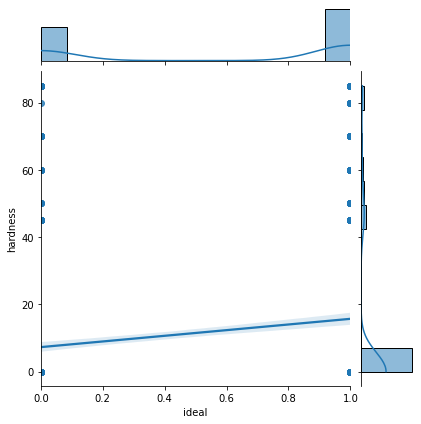

In [15]:
# plotando a relação linearizada entre os parâmetros "ideal" e "hardness" (dureza) 
sns.jointplot(data=df2, x="ideal", y="hardness", kind="reg")
stats.pearsonr(df2['ideal'],df2['hardness'])
print ('Pearson, P-Valor = ', stats.pearsonr(df2['ideal'],df2['hardness']))

Pearson, P-Valor =  (0.16965639541815836, 6.665637636026674e-12)


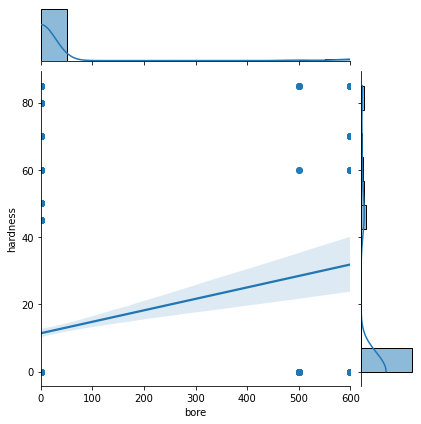

In [16]:
# plotando a relação linearizada entre os parâmetros "ideal" e "hardness" (dureza) 
sns.jointplot(data=df2, x="bore", y="hardness", kind="reg")
stats.pearsonr(df2['bore'],df2['hardness'])
print ('Pearson, P-Valor = ', stats.pearsonr(df2['bore'],df2['hardness']))


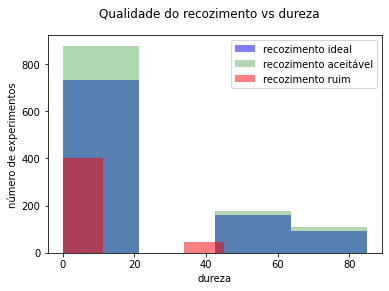

In [17]:
# histograma com a distribuição dos experimentos com o nível de dureza, plotado com os resultados de qualidade de recozimento obtido
fig, ax = plt.subplots()

ax.hist(df2[df2["ideal"]==1]["hardness"], bins=4, alpha=0.5, color="blue", label="recozimento ideal")
ax.hist(df2[df2["ruim"]==0]["hardness"], bins=4, alpha=0.3, color="green", label="recozimento aceitável")
ax.hist(df2[df2["ruim"]==1]["hardness"], bins=4, alpha=0.5, color="red", label="recozimento ruim")

ax.set_xlabel("dureza")
ax.set_ylabel("número de experimentos")

fig.suptitle("Qualidade do recozimento vs dureza")

ax.legend();

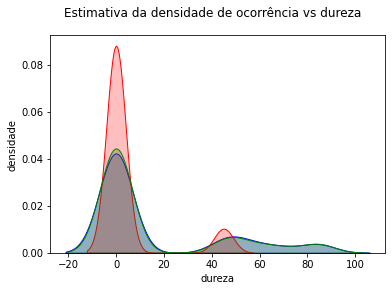

In [18]:
# estimativa da densidade da ocorrência 
fig, ax = plt.subplots()

sns.kdeplot(df2[df2["ideal"]==1]["hardness"], shade=True, color="blue", label="recozimento ideal", ax=ax)
sns.kdeplot(df2[df2["ruim"]==1]["hardness"], shade=True, color="red", label="recozimento ruim", ax=ax)
sns.kdeplot(df2[df2["ruim"]==0]["hardness"], shade=True, color="green", label="recozimento aceitavel", ax=ax)

ax.set_xlabel("dureza")
ax.set_ylabel("densidade")

fig.suptitle("Estimativa da densidade de ocorrência vs dureza");

C:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


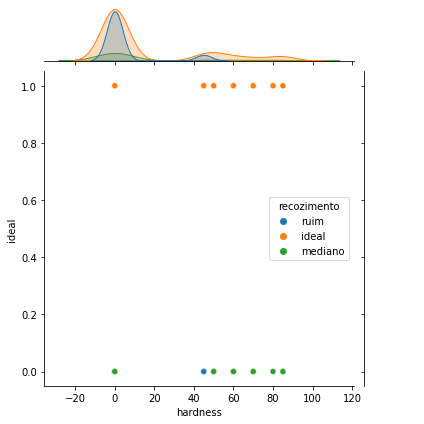

In [19]:
sns.jointplot(data=df2, x="hardness", y="ideal", hue="recozimento")

Ao contrário da distribuição normal, tanto o histograma como o gráfico de densidade de distribuição mostram algumas tendências de mudança na qualidade do recozimento com base na ordem da dureza. Durezas extremamente baixas tendem a apresentar um recozimento de qualidade mas com grande variânica de resultados, podendo apresentar tanto resultados positivos quanto negativos. No entando, a distribuição nos mostra que a partir de durezas da ordem de 40, os resultados de cozimento considerados como positivos predominam e se tornam constantes, não apresentando mais resultados insatisfatórios a partir desta faixa.
 

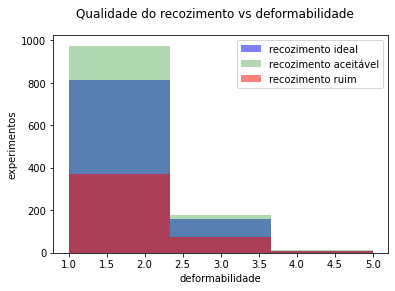

In [20]:
# histograma com a distribuição dos experimentos com o nível de deformabilidade, plotado com os resultados de qualidade de recozimento obtido
fig, ax = plt.subplots()

ax.hist(df2[df2["ideal"]==1]["formability"], bins=3, alpha=0.5, color="blue", label="recozimento ideal")
ax.hist(df2[df2["ruim"]==0]["formability"], bins=3, alpha=0.3, color="green", label="recozimento aceitável")
ax.hist(df2[df2["ruim"]==1]["formability"], bins=3, alpha=0.5, color="red", label="recozimento ruim")

ax.set_xlabel("deformabilidade")
ax.set_ylabel("experimentos")

fig.suptitle("Qualidade do recozimento vs deformabilidade")

ax.legend();

Resultados mostram uma maior predominância de resultados positivos, isto é, classificados como ideal ou aceitável, nas faixas de menor valor da deformabilidade.

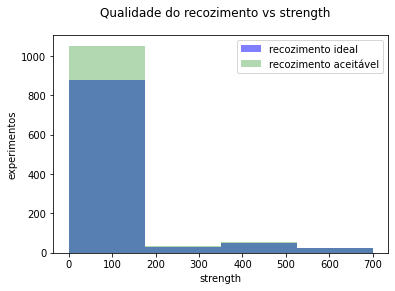

In [21]:
# histograma com a distribuição dos experimentos com o nível com a variável strength, plotado com os resultados positivos de qualidade de recozimento obtido
fig, ax = plt.subplots()

ax.hist(df2[df2["ideal"]==1]["strength"], bins=4, alpha=0.5, color="blue", label="recozimento ideal")
ax.hist(df2[df2["ruim"]==0]["strength"], bins=4, alpha=0.3, color="green", label="recozimento aceitável")


ax.set_xlabel("strength")
ax.set_ylabel("experimentos")

fig.suptitle("Qualidade do recozimento vs strength")

ax.legend();

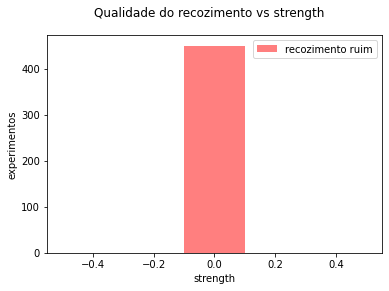

In [22]:
# histograma com a distribuição dos experimentos com o nível com a variável strength, plotado com os resultados insatisfatório de qualidade do recozimento obtido
fig, ax = plt.subplots()

ax.hist(df2[df2["ruim"]==1]["strength"], bins=5, alpha=0.5, color="red", label="recozimento ruim")


ax.set_xlabel("strength")
ax.set_ylabel("experimentos")

fig.suptitle("Qualidade do recozimento vs strength")

ax.legend();

Ja análise comparativa com a variável 'strength mostra como esta já possui uma maior correlação com a qualidade obtida do recozimento. Uma observação inferida da análise mostra que os resultados classificados como insatisfatórios para o recozimento foram obtidos exclusivamente dos experimentos cuja resultado para a variável 'strength' foram nulos.  

### 4. Conclusões

Os resultados nos permitem, até esta fase da análise, inferir alguns pontos importante do comportamento deste processo.
Durezas extremamente baixas tendem a apresentar um recozimento com grande variânica nos resultados, podendo apresentar tanto resultados positivos quanto negativos indistintamente. No entando, a distribuição nos mostra que a partir de durezas da ordem de 40, os resultados de cozimento considerados como positivos predominam e se tornam constantes, não apresentando mais resultados insatisfatórios a partir desta faixa. Da mesma forma, a qualidade do recozimento mostrou-se adequada sempre que a variável 'strength' foi maior que zero. Assim principais outputs deste estudo são:

* Baixas durezas não são sinônimos de qualidade adequada do recozimento;

* Para uma maior segurança, sugere-se que se trabalhe com durezas da ordem de 50 como forma de aumentar a qualidade obtida do recozimento;

* A variável 'strength' tem correlação positiva com a qualidade do recozimento e deve ser observada com atenção.   
 

### 5.  Encaminhamentos


Com base nos resultados obtidos, o recomendado seria o desenvolvimento de um modelo de predição da variável de qualidade de recozimento utilizando técnicas de treinamento supervisionado de classificação. Um bom candidato a modelo para este case seria a regressão logística, utilizando-se para tal fim as variáveis de maior correlação com a qualidade do recozimento, nomeadamente, 'hardness', 'formability', 'strenght' e 'carbon'.